In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

crime_data = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/6.Clustering/crime_data.csv")
crime_data.head(3)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [2]:
#Normalize data

def norm_func(i):
    x=(i-i.min())/(i.max() - i.min())
    return(x)

n_crimedata = norm_func(crime_data.iloc[:,1:])
n_crimedata.head(3)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403


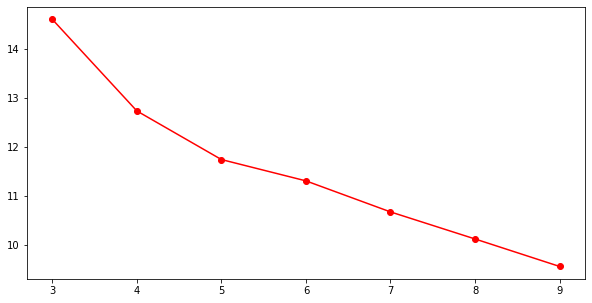

In [3]:
#Generate Elbow Curve

k = list(range(3,10))

Total_WSS=[]

for i in k:
    kmean=KMeans(n_clusters=i).fit(n_crimedata)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(n_crimedata.iloc[kmean.labels_==j,:],kmean.cluster_centers_[j].reshape(1,n_crimedata.shape[1]),"euclidean" )))
    Total_WSS.append(sum(WSS))
plt.figure(figsize=(10,5))
plt.plot(k,Total_WSS,'ro-') 
plt.xticks(k)
plt.show()


In [4]:
# Applying K-means clustering

Kmean_model=KMeans(n_clusters=4).fit(n_crimedata)
model_labels=pd.Series(Kmean_model.labels_)  # converting numpy array into pandas series object 

crime_data['cluster']=model_labels # creating a  new column and assigning it to new column 
crime_data = crime_data.iloc[:,[5,0,1,2,3,4]]

crime_data.iloc[:,1:7].groupby(crime_data.cluster).mean()
crime_data.sort_values(by=['cluster'], inplace=True)

print(crime_data.head())



    cluster       State  Murder  Assault  UrbanPop  Rape
21        0    Michigan    12.1      255        74  35.1
1         0      Alaska    10.0      263        48  44.5
2         0     Arizona     8.1      294        80  31.0
19        0    Maryland    11.3      300        67  27.8
4         0  California     9.0      276        91  40.6


In [5]:
crime_data.to_csv("crime_data_Kmean.csv")